# Face Recognition with LBP, PCA and MLP

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# ✅ Step 1: Load images and labels from a folder (e.g. /content/drive/MyDrive/FEI_faces)
def load_images_and_labels(folder):
    images = []
    labels = []
    for filename in sorted(os.listdir(folder)):
        if filename.endswith(".jpg"):
            path = os.path.join(folder, filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (100, 100))
            images.append(img)
            label = filename.split('-')[0]  # ID from filename
            labels.append(label)
    return np.array(images), np.array(labels)

# ✅ Step 2: Load data 
images, labels = load_images_and_labels("originalimages")

In [3]:
# Normalize and reshape
X = images / 255.0
X = X.reshape(-1, 100, 100, 1)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
y_categorical = to_categorical(y_encoded)

In [4]:
# ✅ Step 3: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, stratify=y_categorical, random_state=42)

In [5]:
# ✅ Step 4: Define CNN + MLP model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\abidi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# ✅ Step 5: Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.0050 - loss: 5.3251 - val_accuracy: 0.0375 - val_loss: 5.1787
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - accuracy: 0.0451 - loss: 4.9765 - val_accuracy: 0.2482 - val_loss: 3.8007
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - accuracy: 0.1817 - loss: 3.6722 - val_accuracy: 0.5750 - val_loss: 2.2607
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - accuracy: 0.3408 - loss: 2.6304 - val_accuracy: 0.7179 - val_loss: 1.4397
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 200ms/step - accuracy: 0.4943 - loss: 1.8805 - val_accuracy: 0.8196 - val_loss: 0.9921
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 202ms/step - accuracy: 0.5846 - loss: 1.4822 - val_accuracy: 0.8232 - val_loss: 0.7950
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.6706 - loss: 1.2025 - val_accuracy: 0.8446 - val_loss: 0.6442
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step - accuracy: 0.7012 - loss: 1.0598 - val_accu

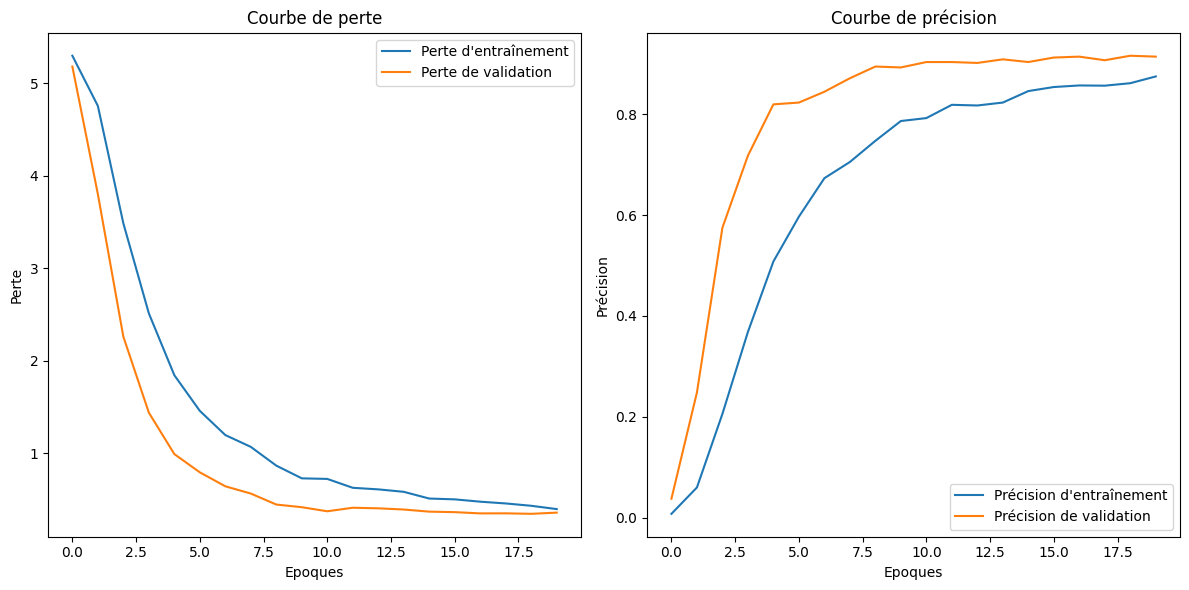

In [10]:
# ✅ Step 6: Plot learning curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Perte d'entraînement")
plt.plot(history.history['val_loss'], label="Perte de validation")
plt.title('Courbe de perte')
plt.xlabel('Epoques')
plt.ylabel('Perte')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Précision d'entraînement")
plt.plot(history.history['val_accuracy'], label="Précision de validation")
plt.title('Courbe de précision')
plt.xlabel('Epoques')
plt.ylabel('Précision')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# ✅ Step 7: Predict function for one image
def predict_face(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("❌ Image introuvable.")
        return
    img = cv2.resize(img, (100, 100)) / 255.0
    img = img.reshape(1, 100, 100, 1)
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)
    identity = le.inverse_transform([predicted_label])[0]

    plt.imshow(img.reshape(100, 100), cmap='gray')
    plt.title(f"Visage reconnu : {identity}")
    plt.axis('off')
    plt.show()

    return identity

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


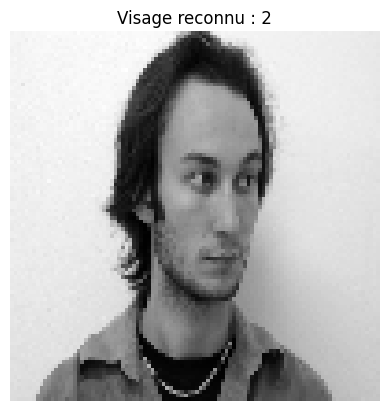

'2'

In [12]:
# Testing the model
predict_face("originalimages/2-08.jpg")